In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
import pandas as pd


# Wczytanie danych
penguins = sns.load_dataset("penguins")

# Tworzymy kolumnę 'day' dla symulacji danych szeregów czasowych (100 dni)
np.random.seed(42)
penguins['day'] = np.random.choice(pd.date_range('2020-01-01', periods=100, freq='D'), size=penguins.shape[0])

# Zakładając, że masa ciała pingwinów zmienia się w czasie, dodajemy losowy szum do 'body_mass_g'
penguins['body_mass_g'] = penguins['body_mass_g'] + np.random.normal(0, 30, size=penguins.shape[0])

# Teraz możemy analizować zmiany masy ciała pingwinów w czasie

In [2]:
#wczytanie zbioru iris(irysy)
iris = sns.load_dataset("iris")

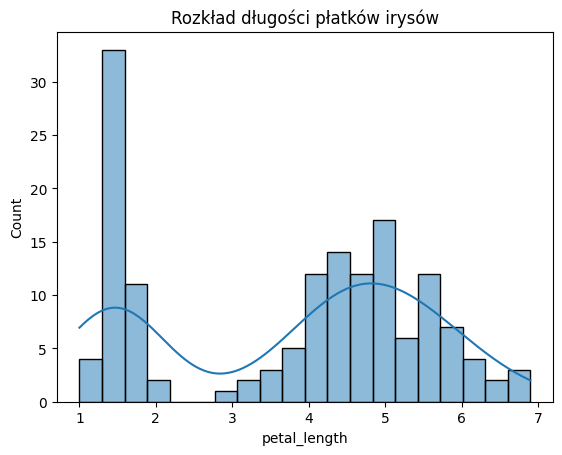

In [3]:
#tworzenie histogramu
sns.histplot(iris["petal_length"],bins=20,kde=True)

plt.title('Rozkład długości płatków irysów')
plt.show()

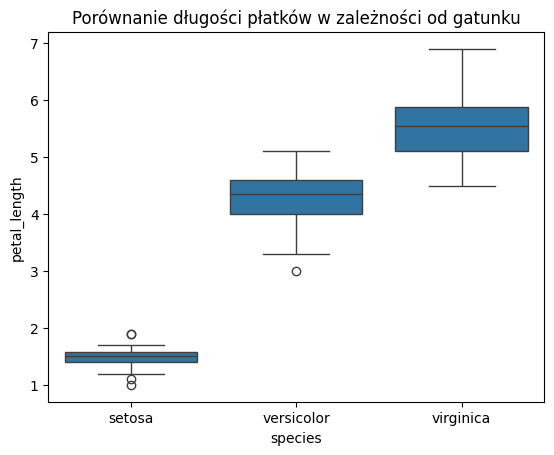

In [4]:
#tworzenie wykresu typu boxplot
sns.boxplot(x="species",y="petal_length",data=iris)
plt.title("Porównanie długości płatków w zależności od gatunku")
plt.show()

In [5]:
#utworzenie macierzy korelacji między cechami w zbiorze danych iris - heatmapa
#obliczenie macierzy korealacji
corr = iris.corr(numeric_only=True)

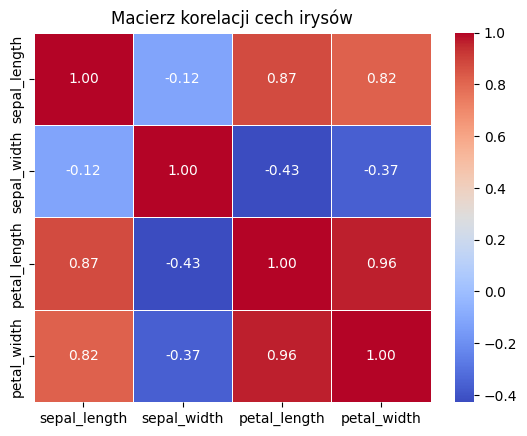

In [6]:
#tworzenie heatmapy
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Macierz korelacji cech irysów")
plt.show()

In [7]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
#dane odstające
#z-score dla długości płatków
iris["petal_length_zscore"] = zscore(iris["petal_length"])

In [9]:
#wykryeanie danych odstających (zscore > 3 lub < -3)
outliers = iris[iris["petal_length_zscore"].abs()>3]

In [10]:
print(f"dane odstające: {outliers}")

dane odstające: Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species, petal_length_zscore]
Index: []


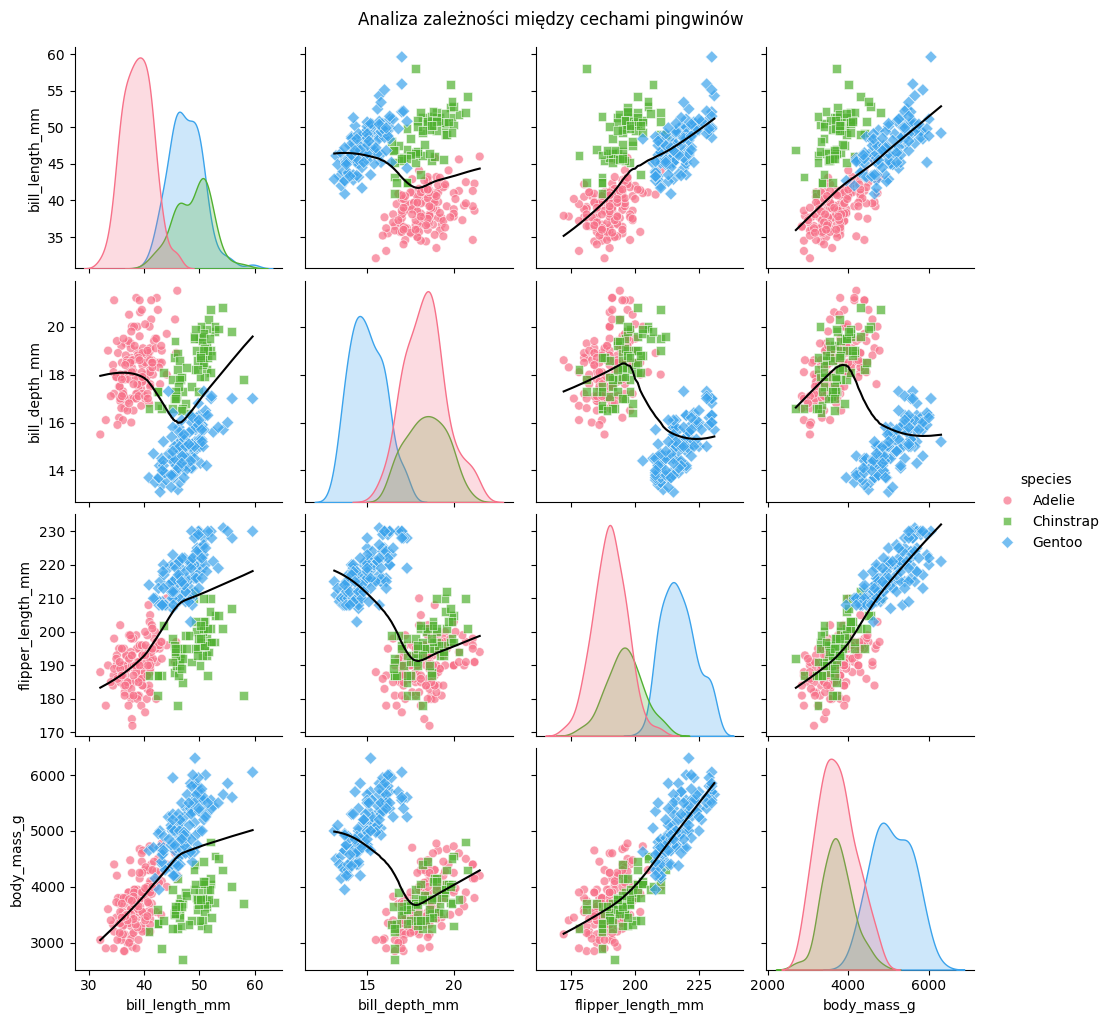

In [11]:
# Wczytanie danych
penguins = sns.load_dataset("penguins").dropna()  # Usuwamy brakujące wartości

# Tworzenie wykresu parowego z mapowaniem kolorów i dopasowaniem regresji
g = sns.pairplot(
    penguins,
    hue="species",  # Kolorowanie według gatunku
    markers=["o", "s", "D"],  # Różne znaczniki dla każdego gatunku
    diag_kind="kde",  # Wykresy gęstości na przekątnej
    palette="husl",  # Kolorystyka
    plot_kws={'alpha': 0.7, 's': 40},  # Przezroczystość i rozmiar punktów
)

# Dodanie dopasowania regresji Lowess do wykresów rozrzutu
for ax in g.axes.flatten():
    if ax is not None and hasattr(ax, 'get_xlabel'):
        xlabel = ax.get_xlabel()
        ylabel = ax.get_ylabel()
        if xlabel and ylabel and xlabel != ylabel:
            sns.regplot(
                data=penguins,
                x=xlabel,
                y=ylabel,
                scatter=False,
                lowess=True,
                ax=ax,
                line_kws={'color': 'black', 'lw': 1.5}
            )

plt.suptitle("Analiza zależności między cechami pingwinów", y=1.02)
plt.show()

In [12]:
# Wczytanie danych
penguins = sns.load_dataset("penguins")

# Tworzymy kolumnę 'day' dla symulacji danych szeregów czasowych (100 dni)
np.random.seed(42)
penguins['day'] = np.random.choice(pd.date_range('2020-01-01', periods=100, freq='D'), size=penguins.shape[0])

# Zakładając, że masa ciała pingwinów zmienia się w czasie, dodajemy losowy szum do 'body_mass_g'
penguins['body_mass_g'] = penguins['body_mass_g'] + np.random.normal(0, 30, size=penguins.shape[0])

# Teraz możemy analizować zmiany masy ciała pingwinów w czasie

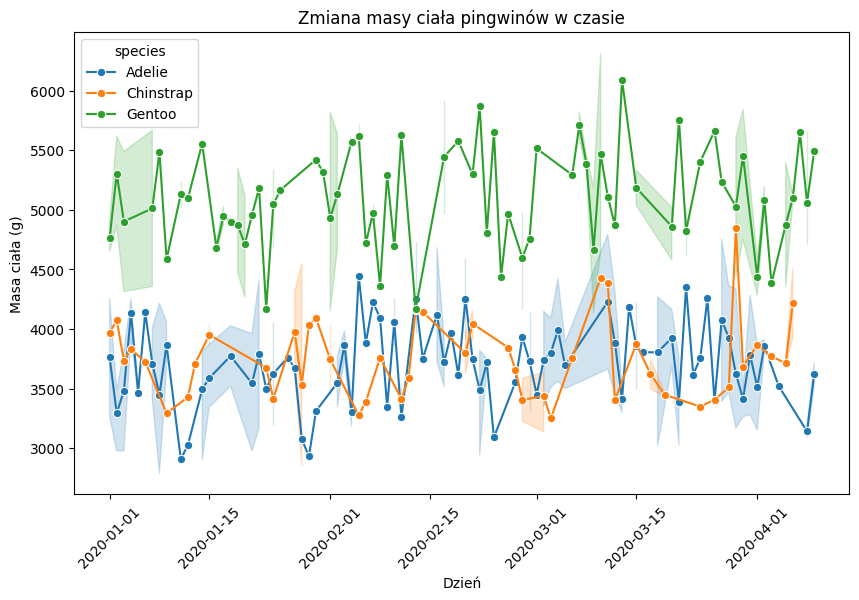

In [13]:
# Tworzenie wykresu z zależnością masy ciała pingwinów od dnia
plt.figure(figsize=(10, 6))
sns.lineplot(data=penguins, x='day', y='body_mass_g', hue='species', marker='o')

plt.title('Zmiana masy ciała pingwinów w czasie')
plt.xlabel('Dzień')
plt.ylabel('Masa ciała (g)')
plt.xticks(rotation=45)
plt.show()

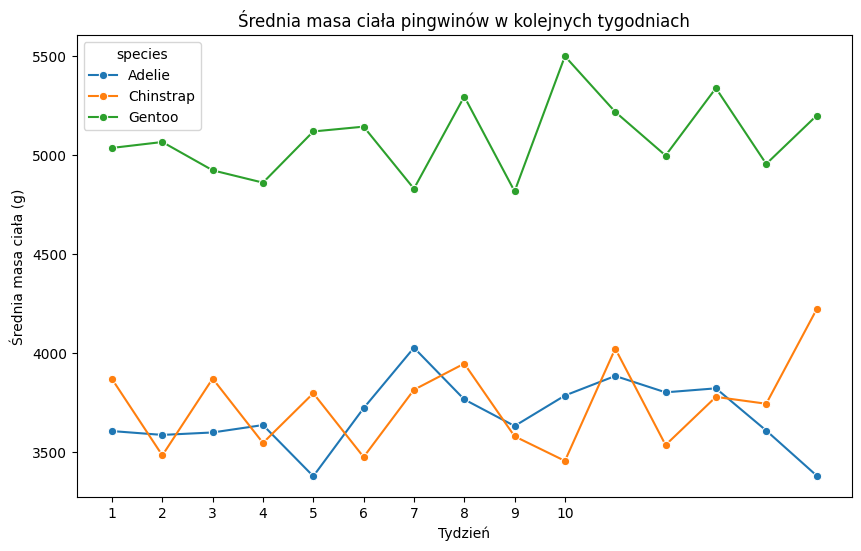

In [16]:
penguins['week'] = penguins['day'].dt.isocalendar().week

# Obliczenie średniej masy ciała pingwinów na każdy tydzień
weekly_avg = penguins.groupby(['week', 'species'])['body_mass_g'].mean().reset_index()

# Wykres średnich mas ciała pingwinów w każdym tygodniu
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekly_avg, x='week', y='body_mass_g', hue='species', marker='o')

plt.title('Średnia masa ciała pingwinów w kolejnych tygodniach')
plt.xlabel('Tydzień')
plt.ylabel('Średnia masa ciała (g)')
plt.xticks(range(1, 11))  # Załóżmy, że mamy 10 tygodni
plt.show()

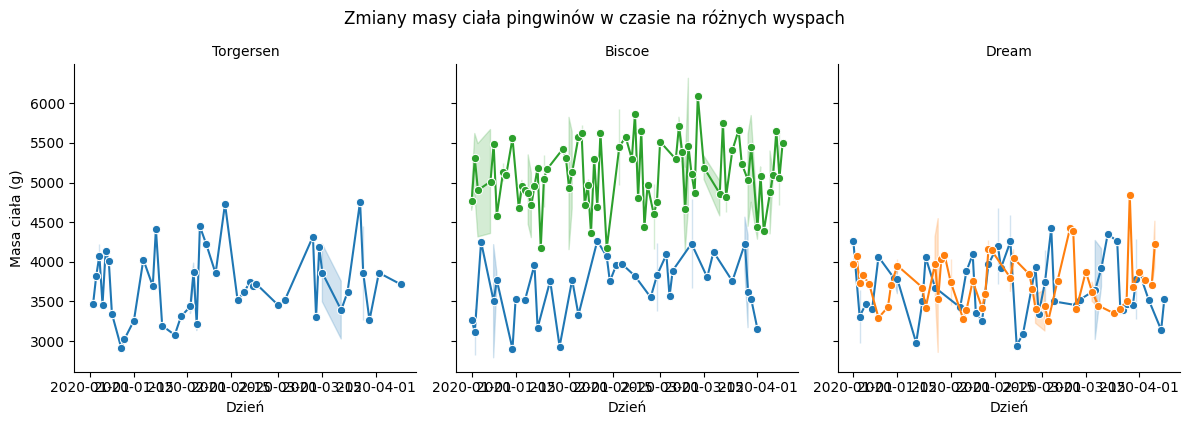

In [18]:
# Wykres z facetami – masa ciała na różnych wyspach w czasie
g = sns.FacetGrid(penguins, col="island", col_wrap=3, height=4)
# Pass data and hue as arguments to g.map
g.map(sns.lineplot, "day", "body_mass_g",  marker="o", data=penguins, hue="species")

g.set_axis_labels('Dzień', 'Masa ciała (g)')
g.set_titles("{col_name}")
g.fig.suptitle('Zmiany masy ciała pingwinów w czasie na różnych wyspach', y=1.05)
plt.show()